In [12]:
pd.set_option('display.max_columns',100)

In [2]:
import pandas as pd

In [15]:
# Load the dataset
data = pd.read_csv('../data/main_aly_spotify.csv')

# Display the first few rows of the dataset
data.head()


,track_popularity,mode,speechiness,instrumentalness,energy,danceability,liveness,acousticness,valence,duration_ms,type,key,tempo,loudness
0,90,0.0,0.244,0.000002,0.520,0.561,0.3550,0.05030,0.424,239360.0,audio_features,11.0,153.150,-9.342
1,78,0.0,0.323,0.000000,0.546,0.908,0.0707,0.01270,0.225,170502.0,audio_features,8.0,131.016,-10.491
2,81,1.0,0.591,0.000000,0.358,0.841,0.3900,0.02010,0.329,261544.0,audio_features,9.0,158.014,-8.368
3,75,0.0,0.316,0.000000,0.433,0.849,0.3880,0.04070,0.395,152962.0,audio_features,5.0,142.110,-8.434
4,77,1.0,0.198,0.000000,0.614,0.934,0.1230,0.00274,0.616,160821.0,audio_features,5.0,144.045,-7.384


### EDA

In [13]:
tracks.head()

,Unnamed: 0,artist,album,track_name,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Drake,Her Loss,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,90,0.561,0.520,11,-9.342,0,0.244,0.05030,0.000002,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
1,1,Drake,Her Loss,Major Distribution,46s57QULU02Voy0Kup6UEb,78,0.908,0.546,8,-10.491,0,0.323,0.01270,0.000000,0.0707,0.225,131.016,audio_features,46s57QULU02Voy0Kup6UEb,spotify:track:46s57QULU02Voy0Kup6UEb,https://api.spotify.com/v1/tracks/46s57QULU02V...,https://api.spotify.com/v1/audio-analysis/46s5...,170502,4
2,2,Drake,Her Loss,On BS,34tz0eDhGuFErIuW3q4mPX,81,0.841,0.358,9,-8.368,1,0.591,0.02010,0.000000,0.3900,0.329,158.014,audio_features,34tz0eDhGuFErIuW3q4mPX,spotify:track:34tz0eDhGuFErIuW3q4mPX,https://api.spotify.com/v1/tracks/34tz0eDhGuFE...,https://api.spotify.com/v1/audio-analysis/34tz...,261544,4
3,3,Drake,Her Loss,BackOutsideBoyz,0wshkEEcJUQU33RSRBb5dv,75,0.849,0.433,5,-8.434,0,0.316,0.04070,0.000000,0.3880,0.395,142.110,audio_features,0wshkEEcJUQU33RSRBb5dv,spotify:track:0wshkEEcJUQU33RSRBb5dv,https://api.spotify.com/v1/tracks/0wshkEEcJUQU...,https://api.spotify.com/v1/audio-analysis/0wsh...,152962,4
4,4,Drake,Her Loss,Privileged Rappers,7l2nxyx7IkBX5orhkALg0V,77,0.934,0.614,5,-7.384,1,0.198,0.00274,0.000000,0.1230,0.616,144.045,audio_features,7l2nxyx7IkBX5orhkALg0V,spotify:track:7l2nxyx7IkBX5orhkALg0V,https://api.spotify.com/v1/tracks/7l2nxyx7IkBX...,https://api.spotify.com/v1/audio-analysis/7l2n...,160821,4


## Train test Split

In [17]:
from sklearn.model_selection import train_test_split

# Drop the 'type' column
data.drop(columns=['type'], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14270, 12), (3568, 12), (14270,), (3568,))

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_model.predict(X_test)

# Calculate the mean squared error for the linear model
linear_mse = mean_squared_error(y_test, linear_predictions)

linear_mse


566.3049145134436

## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)

rf_mse


324.00168922908824

## Hyper Parameter tuning - Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the hyperparameters and their possible values
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setup the grid search
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Start the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
best_params_rf




Fitting 3 folds for each of 216 candidates, totalling 648 fits


/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
178 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhishek-mehra

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

Optimized MSE for Random Forest: 322.36608369120097


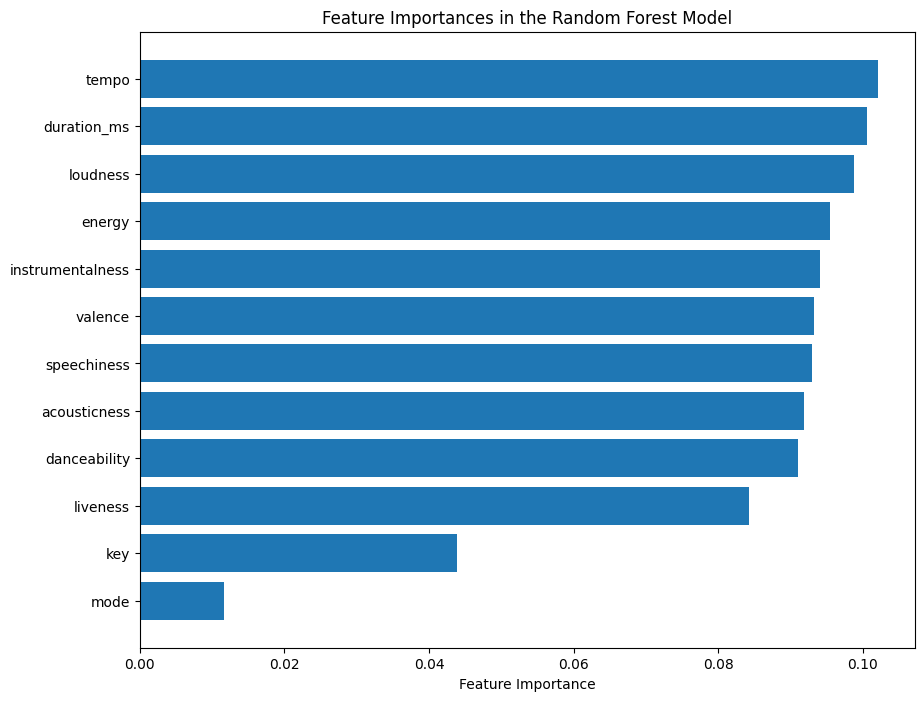

In [38]:
# Train the Random Forest model with the best hyperparameters
optimized_rf = RandomForestRegressor(**best_params_rf, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predict on the test set
optimized_rf_predictions = optimized_rf.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the optimized model
optimized_rf_mse = mean_squared_error(y_test, optimized_rf_predictions)

print(f"Optimized MSE for Random Forest: {optimized_rf_mse}")

# Plotting feature importances for Random Forest
feature_importances_rf = optimized_rf.feature_importances_
sorted_idx_rf = feature_importances_rf.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx_rf], feature_importances_rf[sorted_idx_rf])
plt.xlabel("Feature Importance")
plt.title("Feature Importances in the Random Forest Model")
plt.show()


## XgBoost

In [30]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate the mean squared error for the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_predictions)

xgb_mse


/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_

371.62692001184536

## Hyper para meter Tuning - XGBoost



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators': [100, 200]  # reduced n_estimators to speed up the process
}

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the grid search
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Start the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

best_params


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.9}

## Applying best parameter as per hyper parameter tuning- XGboost


In [33]:
# Train the XGBoost model with the best hyperparameters
optimized_xgb = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
optimized_xgb.fit(X_train, y_train)

# Predict on the test set
optimized_xgb_predictions = optimized_xgb.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the optimized model
optimized_xgb_mse = mean_squared_error(y_test, optimized_xgb_predictions)

optimized_xgb_mse


/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_

353.3558060138523

## Feature Importance

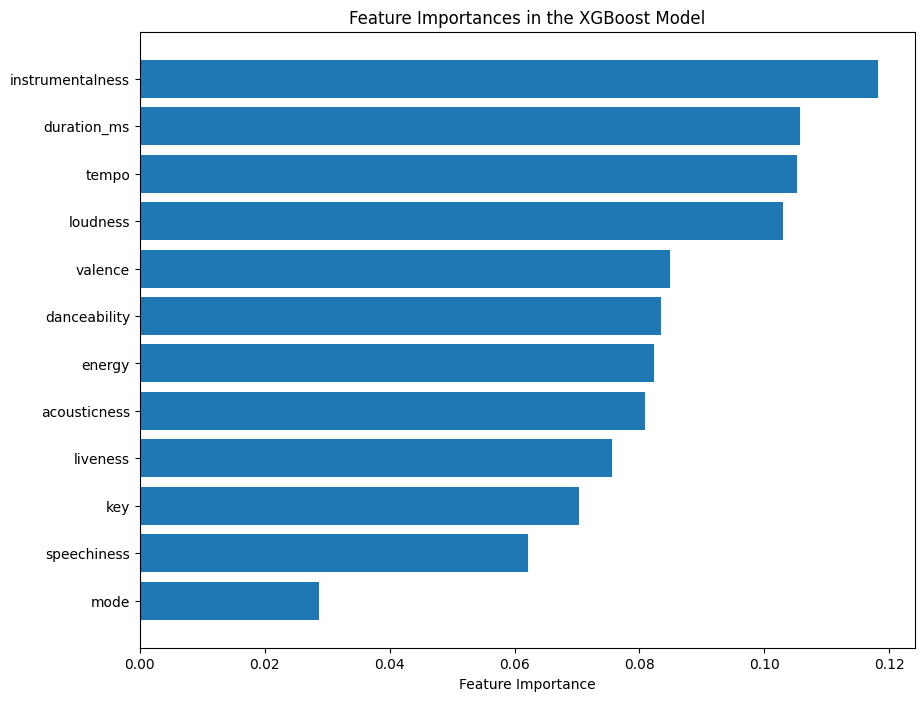

In [36]:
from matplotlib import pyplot as plt
# Once you have the trained optimized_xgb model:
feature_importances = optimized_xgb.feature_importances_

# Sort the features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances in the XGBoost Model")
plt.show()
